In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('future.no_silent_downcasting', True)

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.shape

(5110, 12)

In [4]:
data.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.work_type.value_counts()

work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [12]:
data[data.smoking_status == 'Unknown'].stroke.value_counts()

stroke
0    1454
1      29
Name: count, dtype: int64

In [13]:
data[data.smoking_status == 'never smoked'].stroke.value_counts()

stroke
0    1768
1      84
Name: count, dtype: int64

In [15]:
data[data.smoking_status == 'smokes'].stroke.value_counts()

stroke
0    698
1     39
Name: count, dtype: int64

In [35]:
df2 = data.drop(['smoking_status','id'], axis=1)

In [14]:
data.Residence_type.value_counts()

Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64

In [21]:
df2.ever_married.value_counts()

ever_married
Yes    3204
No     1705
Name: count, dtype: int64

In [22]:
df2.gender.value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [36]:
df2 = df2[~(df2['gender'] == 'Other')]

In [37]:
df2.replace({
    'Residence_type' : {'Urban' : 0, 'Rural' : 1},
    'ever_married' : {'No' : 0, 'Yes' : 1},
    'gender' : {'Female' : 0, 'Male' : 1}
}, inplace=True)

In [70]:
df2['Residence_type'] = df2['Residence_type'].astype(int)
df2['ever_married'] = df2['ever_married'].astype(int)
df2['gender'] = df2['gender'].astype(int)

In [71]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Govt_job,Never_worked,Private,Self-employed,children
0,1,67.0,0,1,1,Private,0,228.69,36.6,1,0,0,1,0,0,0,0,1,0,0
2,1,80.0,0,1,1,Private,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0,0
3,0,49.0,0,0,1,Private,0,171.23,34.4,1,0,0,1,0,0,0,0,1,0,0
4,0,79.0,1,0,1,Self-employed,1,174.12,24.0,1,0,0,0,1,0,0,0,0,1,0
5,1,81.0,0,0,1,Private,0,186.21,29.0,1,0,0,1,0,0,0,0,1,0,0


In [56]:
dummies = pd.get_dummies(df2.work_type, dtype=int)
df2 = pd.concat([df2, dummies], axis=1)

In [254]:
df2[df2.stroke == 1].tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Govt_job,Never_worked,Private,Self-employed,children
243,0,68.0,1,1,1,Private,0,247.51,40.5,1,0,0,1,0,0,0,0,1,0,0
244,1,57.0,0,0,1,Private,1,84.96,36.7,1,0,0,1,0,0,0,0,1,0,0
245,0,14.0,0,0,0,children,1,57.93,30.9,1,0,0,0,0,1,0,0,0,0,1
246,0,75.0,0,0,1,Self-employed,1,78.80,29.3,1,0,0,0,1,0,0,0,0,1,0
248,0,78.0,0,0,1,Private,1,78.81,19.6,1,0,0,1,0,0,0,0,1,0,0


In [298]:
X = df2.drop(['work_type', 'stroke'], axis=1)
y = df2['stroke']

In [299]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=6)
selector.fit(X, y)
selected_features = selector.get_support(indices=True)

In [300]:
X_selected = X.iloc[:, selected_features]

In [301]:
X_selected

,age,hypertension,heart_disease,ever_married,avg_glucose_level,children
0,67.0,0,1,1,228.69,0
2,80.0,0,1,1,105.92,0
3,49.0,0,0,1,171.23,0
4,79.0,1,0,1,174.12,0
5,81.0,0,0,1,186.21,0
...,...,...,...,...,...,...
5104,13.0,0,0,0,103.08,1
5106,81.0,0,0,1,125.20,0
5107,35.0,0,0,1,82.99,0
5108,51.0,0,0,1,166.29,0


In [302]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X_selected, y)

In [303]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [304]:
X_train.shape, X_test.shape

((8458, 6), (940, 6))

In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [306]:
algos = {
    'LogisticRegression' : {
        'model' : LogisticRegression(max_iter = 1000),
        'params' : {'solver' : ['lbfgs', 'liblinear', 'newton-cholesky']}
    },
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'params' : {'criterion' : ['gini', 'entropy', 'log_loss']}
    },
    'DecisionTreeClassifier' : {
        'model' : DecisionTreeClassifier(),
        'params' : {'criterion' : ['gini', 'entropy', 'log_loss'],
                    'splitter' : ['best', 'random']}
    },
    'SVM' : {
        'model' : svm.SVC(),
        'params' : {'kernel' : ['linear', 'rbf', 'sigmoid']}
    }
}

best_estimator = {}
scores = []

cv = ShuffleSplit(n_splits = 5, test_size = 0.1, random_state = 0)

for name, params in algos.items():
    gs = GridSearchCV(params['model'], params['params'], cv=cv, return_train_score = False)
    gs.fit(X_train,y_train)

    best_estimator[name] = gs.best_estimator_

    scores.append({
        'Model' : name,
        'Best_Score' : gs.best_score_,
        'Best_Params' : gs.best_params_
    })

pd.DataFrame(scores, columns=['Model','Best_Score', 'Best_Params'])


,Model,Best_Score,Best_Params
0,LogisticRegression,0.773286,{'solver': 'liblinear'}
1,RandomForestClassifier,0.914894,{'criterion': 'entropy'}
2,DecisionTreeClassifier,0.904492,"{'criterion': 'gini', 'splitter': 'best'}"
3,SVM,0.772340,{'kernel': 'linear'}


In [307]:
logReg = best_estimator['LogisticRegression']
logReg.fit(X_train,y_train)
print(logReg.score(X_test,y_test))

forest = best_estimator['RandomForestClassifier']
forest.fit(X_train,y_train)
print(forest.score(X_test,y_test))

tree = best_estimator['DecisionTreeClassifier']
tree.fit(X_train,y_train)
print(tree.score(X_test,y_test))

svm = best_estimator['SVM']
svm.fit(X_train,y_train)
print(svm.score(X_test,y_test))

0.8085106382978723
0.9297872340425531
0.9159574468085107
0.8042553191489362


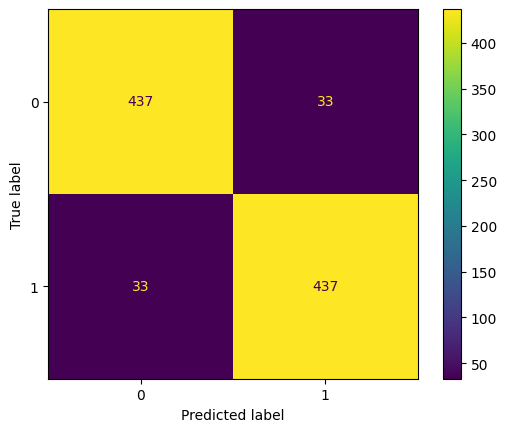

In [308]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = forest.predict(X_test)

cm = confusion_matrix(y_test, pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm)

display.plot()

In [309]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.93      0.93       470

    accuracy                           0.93       940
   macro avg       0.93      0.93      0.93       940
weighted avg       0.93      0.93      0.93       940



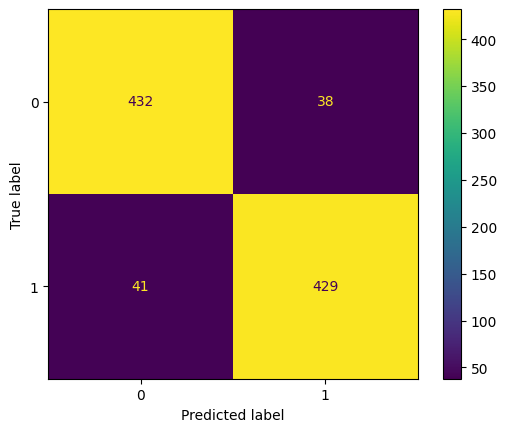

In [310]:
pred = tree.predict(X_test)

cm = confusion_matrix(y_test, pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm)

display.plot()

In [311]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       470
           1       0.92      0.91      0.92       470

    accuracy                           0.92       940
   macro avg       0.92      0.92      0.92       940
weighted avg       0.92      0.92      0.92       940



In [312]:
import pickle
with open('stroke_model.pickle', 'wb') as f:
    pickle.dump(forest, f)

In [313]:
import json
columns = {
    'data_columns' : [col.lower() for col in X_selected.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))